In [1]:
import pandas as pd
import matplotlib.pyplot as plt

lm_path = f"./language_modeling.csv"
mcp_path = f"./multiple_choice_prompt.csv"
poe_path = f"./process_of_elimination.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
poe_df = pd.read_csv(poe_path)


In [2]:
def process(df):
    # get rid of identical rows 
    df = df.drop_duplicates()
    # df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    df = df.drop(columns=["model_family", "seed", "batch_size", "loading_precision", "sample"])
    return df
    

In [3]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
poe_df = process(poe_df)
# concatenate the three dataframes
df = pd.concat([lm_df, mcp_df, poe_df])

In [6]:
# pythia_df = df[df['checkpoint'].str.startswith("EleutherAI")]
# pythia_df[pythia_df['checkpoint'] == "EleutherAI/pythia-70m-deduped"]
# # select rows there method is process of elimination, and data is cqa
# pythia_df[(pythia_df["method"] == "process_of_elimination") & (pythia_df["checkpoint"] == "EleutherAI/pythia-70m-deduped")]

In [36]:
anli_means.head(1)

,,accuracy
method,checkpoint,
average_language_modeling,google/flan-t5-xl,0.38


<AxesSubplot:title={'center':'Accuracy on ANLI'}, xlabel='method,checkpoint'>

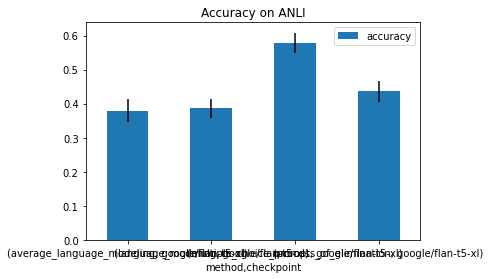

In [38]:
anli_df = df[(df["dataset"] == "anli") & (df["checkpoint"] == "google/flan-t5-xl")].groupby(["method", "checkpoint"])
anli_means = anli_df.mean()
anli_errors = anli_df.std()
# plot with error bars
anli_means.plot.bar(y="accuracy", yerr=anli_errors, rot=0, title="Accuracy on ANLI")


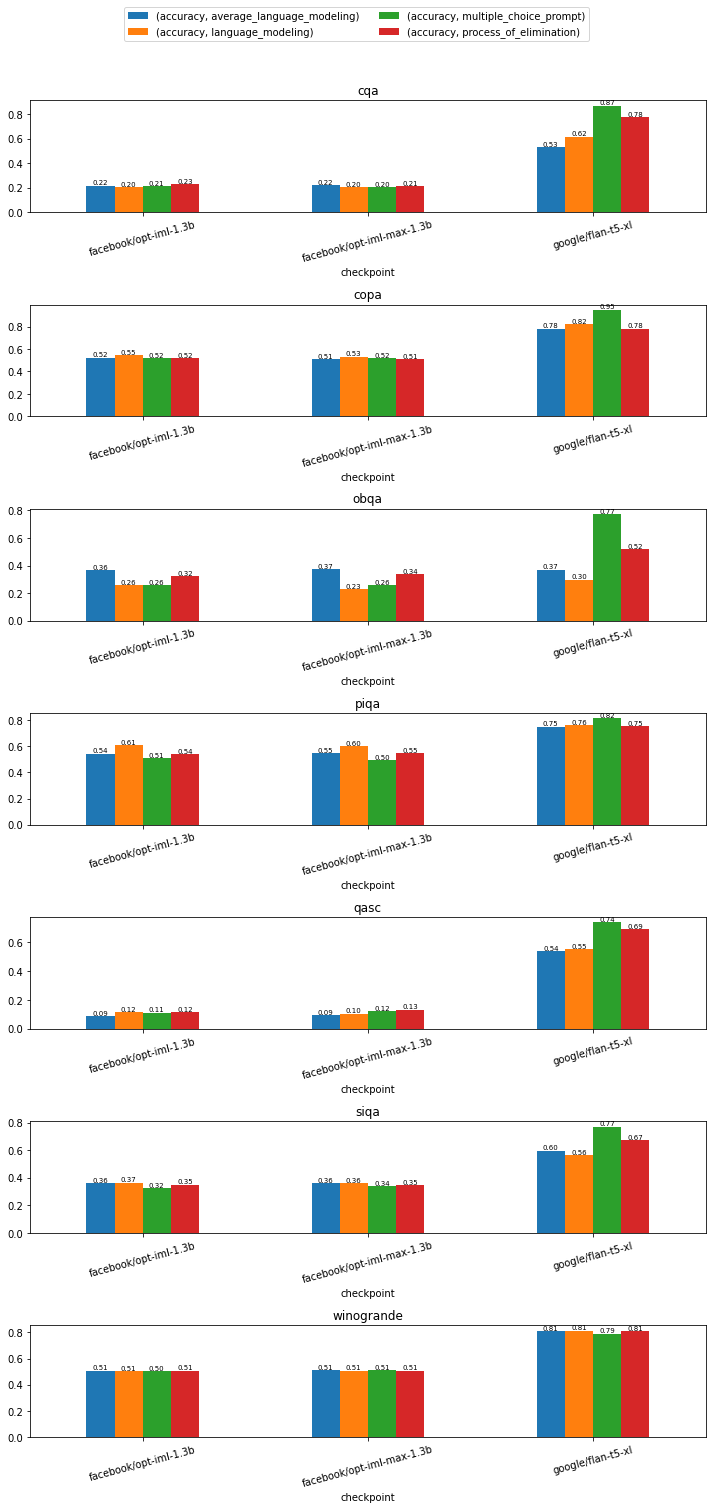

In [12]:
# to do
# 2. (optional) plot confidence interval
# plot the results, grouped by dataset and method, with title and x/y labels
# df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, figsize=(10, 5))

# checkpoints = ["EleutherAI/pythia-70m-deduped", "EleutherAI/pythia-160m-deduped", "EleutherAI/pythia-410m-deduped", "EleutherAI/pythia-1b-deduped"]
# # creating subplots for four models
# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# for i, checkpoint in enumerate(checkpoints):
#     df_vis = df[df["checkpoint"] == checkpoint]
#     df_vis.groupby(["dataset", "method"]).mean().unstack().plot(kind="bar", rot=0, ax=axes[i//2][i%2], title=checkpoint)
#     plt.tight_layout()

datasets = "anli cqa qasc conceptual_combinations emoji_movie ruin_names strange_stories temporal_sequences".split()
# create subplots for seven datasets
fig, axes = plt.subplots(7, 1, figsize=(10, 20))
for i, dataset in enumerate(datasets):
    df_vis = df[df["dataset"] == dataset]
    model_order = ["facebook/opt-iml-1.3b", "facebook/opt-iml-max-1.3b", "google/flan-t5-xl"]
    df_vis = df_vis.groupby(["checkpoint", "method"]).mean().unstack().reindex(model_order)
    df_vis.plot(kind="bar", rot=15, ax=axes[i], title=dataset, legend=False)
    # add accuracy score to each bar
    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%.2f' % float(p.get_height()), ha='center', va='bottom', fontsize=7)

handles, labels = axes[0].get_legend_handles_labels()
# plot legend in two lines
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout()

# save the figure
# plt.savefig("pythia_flan.png", dpi=300, bbox_inches='tight')
